Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Skin Cancer Data


### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [26]:
# Defining the path for train and test images
data_dir_train = pathlib.Path('/content/drive/MyDrive/CNN_SkinCancer/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN_SkinCancer/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2245
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2245 files belonging to 9 classes.
Using 1796 files for training.


In [ ]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2245 files belonging to 9 classes.
Using 449 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Create a code to visualize one instance of all the nine classes present in the dataset

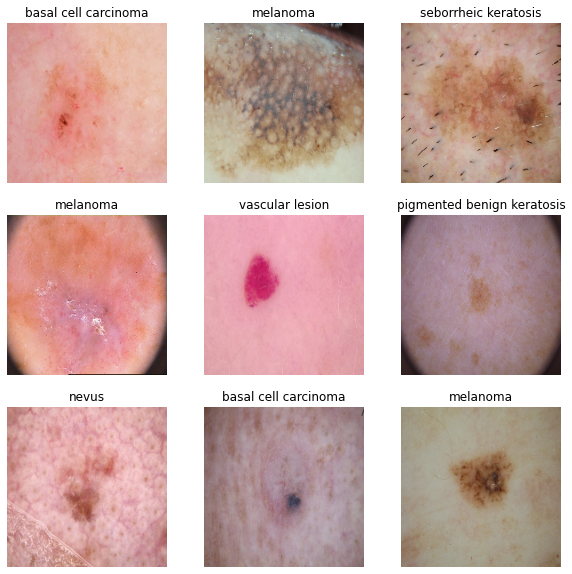

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 415s 2s/step - loss: 1.8372 - accuracy: 0.3530 - val_loss: 2.1747 - val_accuracy: 0.1492
Epoch 2/20
57/57 [==============================] - 2s 41ms/step - loss: 1.6287 - accuracy: 0.4371 - val_loss: 2.1343 - val_accuracy: 0.1492
Epoch 3/20
57/57 [==============================] - 2s 41ms/step - loss: 1.5204 - accuracy: 0.4677 - val_loss: 2.0788 - val_accuracy: 0.1915
Epoch 4/20
57/57 [==============================] - 2s 42ms/step - loss: 1.4184 - accuracy: 0.5167 - val_loss: 2.0659 - val_accuracy: 0.2873
Epoch 5/20
57/57 [==============================] - 3s 45ms/step - loss: 1.3387 - accuracy: 0.5351 - val_loss: 2.0644 - val_accuracy: 0.2472
Epoch 6/20
57/57 [==============================] - 3s 46ms/step - loss: 1.2604 - accuracy: 0.5624 - val_loss: 1.9408 - val_accuracy: 0.2584
Epoch 7/20
57/57 [==============================] - 2s 41ms/step - loss: 1.1903 - accuracy: 0.5774 - val_loss: 1.5780 - val_accuracy: 0.4788
Epoch 8/20
57

### Visualizing training results

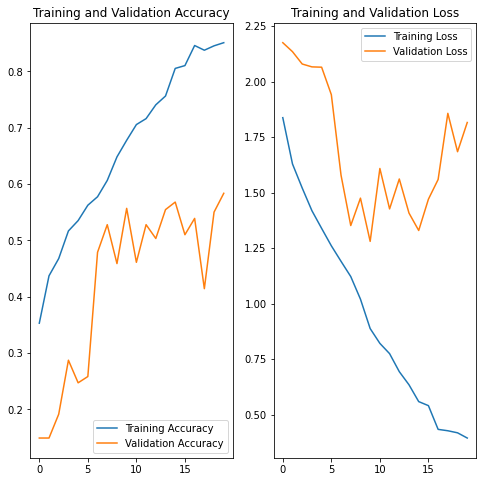

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings: Model  clearly seems to be overfitting because the training accuracy and validation accuracy has a very large difference. If trying to use Dropout layer to avoid overfitting then model is not able to learn properly even on training dataset.


**Data Augmentation technique for Overfitting, Adding more variations/noise to the dataset so that it does not overfit on training data.**




In [17]:
import glob
imagePaths = [x for x in glob.glob(os.path.join(data_dir_train,'*', '*.jpg'))]

def augment_using_ops(images, labels):
	images = tf.image.random_flip_left_right(images)
	images = tf.image.random_flip_up_down(images)
	images = tf.image.rot90(images)
	return (images, labels)

In [18]:


def load_images(imagePath):
	# read the image from disk, decode it, convert the data type to
	# floating point, and resize it
	image = tf.io.read_file(imagePath)
	image = tf.image.decode_jpeg(image, channels=3)
	image = tf.image.convert_image_dtype(image, dtype=tf.float32)
	image = tf.image.resize(image, (156, 156))
	# parse the class label from the file path
	label = tf.strings.split(imagePath, os.path.sep)[-2]
	
	# return the image and the label
	return (image, label)
ds = tf.data.Dataset.from_tensor_slices(imagePaths)
ds = (ds
	.shuffle(len(imagePaths), seed=42)
  .map(load_images, num_parallel_calls=AUTOTUNE)
	.cache()
	.batch(batch_size)
	.map(augment_using_ops, num_parallel_calls=AUTOTUNE)
	.prefetch(tf.data.AUTOTUNE)
)

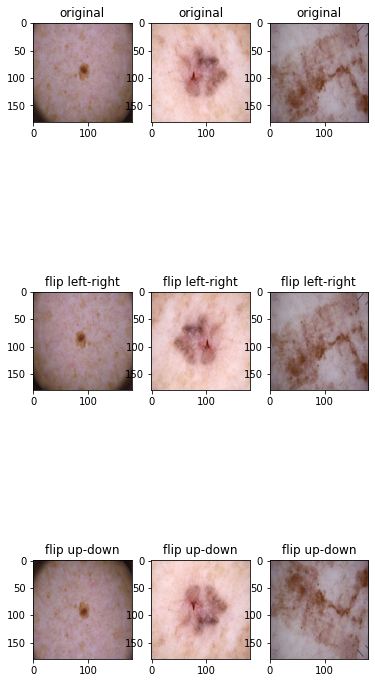

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(6,14))
 
for images, labels in train_ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # flip
        seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
        ax[1][i].imshow(tf.image.stateless_random_flip_left_right(images[i], seed).numpy().astype("uint8"))
        ax[1][i].set_title("flip left-right")
        # flip
        seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
        ax[2][i].imshow(tf.image.stateless_random_flip_up_down(images[i], seed).numpy().astype("uint8"))
        ax[2][i].set_title("flip up-down")
plt.show()

### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes)
])



### Compiling the model

In [21]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [22]:
## train model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


57/57 [==============================] - 20s 128ms/step - loss: 1.8519 - accuracy: 0.3742 - val_loss: 2.1441 - val_accuracy: 0.2739
Epoch 2/20
57/57 [==============================] - 8s 145ms/step - loss: 1.6594 - accuracy: 0.4321 - val_loss: 2.1264 - val_accuracy: 0.1559
Epoch 3/20
57/57 [==============================] - 6s 112ms/step - loss: 1.5550 - accuracy: 0.4705 - val_loss: 2.1129 - val_accuracy: 0.1782
Epoch 4/20
57/57 [==============================] - 8s 139ms/step - loss: 1.5353 - accuracy: 0.4666 - val_loss: 2.0099 - val_accuracy: 0.2918
Epoch 5/20
57/57 [==============================] - 6s 103ms/step - loss: 1.4424 - accuracy: 0.5006 - val_loss: 1.9564 - val_accuracy: 0.2806
Epoch 6/20
57/57 [==============================] - 7s 125ms/step - loss: 1.3927 - accuracy: 0.5284 - val_loss: 1.8546 - val_accuracy: 0.3363
Epoch 7/20
57/57 [==============================] - 7s 124ms/step - loss: 1.3653 - accuracy: 0.5301 - val_loss: 1.7662 - val_accuracy: 0.3608
Epoch 8/20
57/57

### Visualizing the results

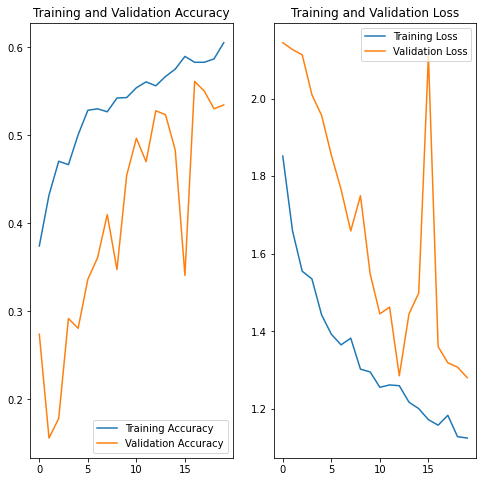

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**#### Findings: Model seems to be underfitting. Reasons could be class imbalance. More noise and variations.**

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
import glob as glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train,'*', '*.jpg'))]
print(path_list[:5])
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*','*.jpg'))]
print(len(set(lesion_list)))

['/content/drive/MyDrive/Skin_cancer_Original/Train/actinic keratosis/ISIC_0028854.jpg', '/content/drive/MyDrive/Skin_cancer_Original/Train/actinic keratosis/ISIC_0029500.jpg', '/content/drive/MyDrive/Skin_cancer_Original/Train/actinic keratosis/ISIC_0025953.jpg', '/content/drive/MyDrive/Skin_cancer_Original/Train/actinic keratosis/ISIC_0029930.jpg', '/content/drive/MyDrive/Skin_cancer_Original/Train/actinic keratosis/ISIC_0030143.jpg']
9


In [25]:
## Your code goes here.
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    468
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### Findings:
1. seborrheic keratosis has the least number of samples.
2. igmented benign keratosis and melanoma dominate the data in terms of proportion.

####Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= "/content/drive/MyDrive/CNN_SkinCancer/Train/"
import Augmentor
##To be done once 
#for i in class_names:
    #p = Augmentor.Pipeline(path_to_training_dataset + i)
    #p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    #p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4622


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
import glob as glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis']

In [30]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [31]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)


In [32]:
new_df['Label'].value_counts()

pigmented benign keratosis    968
melanoma                      938
basal cell carcinoma          876
nevus                         857
actinic keratosis             736
squamous cell carcinoma       681
vascular lesion               639
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [34]:
data_dir_train= "/content/drive/MyDrive/CNN_SkinCancer/Train/" 
print(data_dir_train)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

/content/drive/MyDrive/CNN_SkinCancer/Train/
Found 6861 files belonging to 9 classes.
Using 5489 files for training.


####  Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6861 files belonging to 9 classes.
Using 1372 files for validation.


#### Create model (make sure to include normalization)

In [36]:
## your code goes here
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
 

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes)
])

####  Compile  model (Choose optimizer and loss function appropriately)

In [37]:
## your code goes here
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train  model

In [38]:
epochs = 30
## Your code goes here, use 50 epochs.
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
172/172 [==============================] - 1365s 8s/step - loss: 2.0206 - accuracy: 0.2764 - val_loss: 2.6414 - val_accuracy: 0.1370
Epoch 2/30
172/172 [==============================] - 37s 209ms/step - loss: 1.6916 - accuracy: 0.3645 - val_loss: 2.0157 - val_accuracy: 0.2485
Epoch 3/30
172/172 [==============================] - 37s 209ms/step - loss: 1.5679 - accuracy: 0.4004 - val_loss: 1.5900 - val_accuracy: 0.4257
Epoch 4/30
172/172 [==============================] - 35s 196ms/step - loss: 1.4873 - accuracy: 0.4196 - val_loss: 1.5035 - val_accuracy: 0.4111
Epoch 5/30
172/172 [==============================] - 39s 222ms/step - loss: 1.4088 - accuracy: 0.4476 - val_loss: 1.6257 - val_accuracy: 0.4439
Epoch 6/30
172/172 [==============================] - 35s 200ms/step - loss: 1.3545 - accuracy: 0.4688 - val_loss: 5.9281 - val_accuracy: 0.2063
Epoch 7/30
172/172 [==============================] - 39s 223ms/step - loss: 1.2807 - accuracy: 0.5081 - val_loss: 1.4385 - val_acc

#### **Todo:**  Visualize the model results

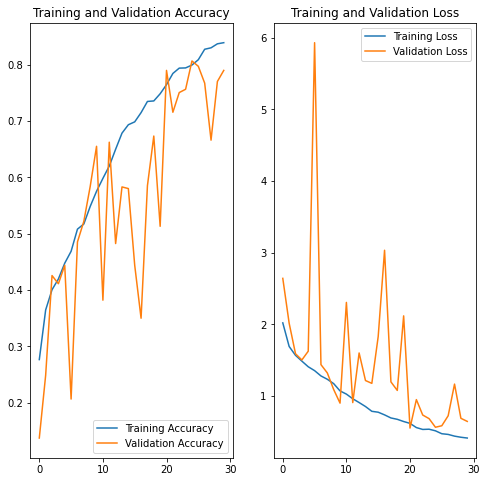

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analysis and conclusion:
 
 - Findings:
- Intial Model with original dataset seems to be Overfitting with training accuracy 85%(could go upto 95 after removing dropout after dense layer and validation accuracy 58%.
- Next model with same complexity just with augmented data looks like underfitting case with train accuracy:60% and validation accuracy 53%
- Last model after treating model with data imbalance and using Augmentor library looks fine. 

